In [141]:
import numpy as np
import csv
import tensorflow as tf
%matplotlib inline
from tensorflow.keras.models import Sequential
from keras import regularizers

from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [222]:
#process all data into matrixs

with open('C:/Users/Nathan/Desktop/Computer Class/DeepLearning.AI/ML project/DC link to scrap/X control with y scrap.csv', 'r') as f:
    reader = csv.reader(f)
    headers = next(reader, None)
    data = list(reader)
myData = np.array(data, dtype=float)
np.random.shuffle(myData)

# col 12 = all scrap   # col 13 = sand scrap   # col 14 = gas scrap
len = myData.shape[0]

#break dataset into 3 groups, train, cv, test
Index = int(len * 0.60 )
trainXy = np.vsplit(myData , [Index,len])[0]
temp = np.vsplit(myData , [Index,len])[1]
cvXy = np.vsplit(temp , 2)[0]
testXy = np.vsplit(temp , 2)[1]

train_X = np.hsplit(trainXy , [12,15])[0]
temp = np.hsplit(trainXy , [12,15])[1]
train_y_all = np.hsplit(temp , 3)[0]
train_y_sand = np.hsplit(temp , 3)[1]
train_y_gas = np.hsplit(temp , 3)[2]

cv_X = np.hsplit(cvXy , [12,15])[0]
temp = np.hsplit(cvXy , [12,15])[1]
cv_y_all = np.hsplit(temp , 3)[0]
cv_y_sand = np.hsplit(temp , 3)[1]
cv_y_gas = np.hsplit(temp , 3)[2]

test_X = np.hsplit(testXy , [12,15])[0]
temp = np.hsplit(testXy , [12,15])[1]
test_y_all = np.hsplit(temp , 3)[0]
test_y_sand = np.hsplit(temp , 3)[1]
test_y_gas = np.hsplit(temp , 3)[2]

#print(test_X)
#print(cv_X)

In [247]:
def makeModel ( lambda_ , numLayers , numPolynomial ) :
    # suggest lambda < 10 
    # suggest numLayers < 6 
    # suggest numPolynomial < 64 , greater than 16 for 5 layer function
    layer_1 = Dense(int(numPolynomial/2), activation = 'relu'      ,    kernel_regularizer=regularizers.L2(lambda_))
    layer_2 = Dense(int(numPolynomial/2), activation = 'relu'      ,    kernel_regularizer=regularizers.L2(lambda_))
    layer_3 = Dense(int(numPolynomial/4), activation = 'relu'      ,    kernel_regularizer=regularizers.L2(lambda_))
    layer_4 = Dense(int(numPolynomial/8), activation = 'sigmoid'      ,    kernel_regularizer=regularizers.L2(lambda_))                
    layer_5 = Dense(1,  activation = 'relu'   ,    kernel_regularizer=regularizers.L2(lambda_))

    if numLayers == 2:
        model = Sequential( [ layer_1, layer_5 ] )
    elif numLayers == 3:
        model = Sequential( [ layer_1, layer_2, layer_5 ] )
    elif numLayers == 4:
        numLayers = Sequential( [ layer_1, layer_2, layer_3, layer_5 ] )
    elif numLayers == 5:
        numLayers = Sequential( [ layer_1, layer_2, layer_3, layer_4, layer_5 ] )
    
    model.compile( loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(0.001), )
    
    model.fit(     train_X,train_y_all,     epochs=10    )
    return model

In [258]:
def cvError( myModel , X_ , y_ ):
    
    eval =  myModel.evaluate(X_)  # model.predict
    
    err = (eval - y_)**2 
    # difference squared model

    #plt.title("Difference Squared Error Values")
    #plt.xlabel("Test # ")
    #plt.ylabel("Err Value")
    #plt.plot(err)
    
    return err.sum() * (1 / (2 * y_.shape[1]))




In [260]:
mylambda = 8
numToCheck = 15
err_layer2_degree16 = np.zeros(numToCheck)
err_layer2_degree8 = np.zeros(numToCheck)
err_layer2_degree4 = np.zeros(numToCheck)

lam_layer2_degree16 = np.zeros(numToCheck)
lam_layer2_degree8 = np.zeros(numToCheck)
lam_layer2_degree4 = np.zeros(numToCheck)

lam_layer3_degree16 = np.zeros(numToCheck)
lam_layer3_degree8 = np.zeros(numToCheck)
lam_layer3_degree4 = np.zeros(numToCheck)

for i in range(numToCheck):

    thisModel = makeModel ( mylambda , 2 , 16 )
    err_layer2_degree16[i] = cvError( thisModel , cv_X , cv_y_all )
    lam_layer2_degree16[i] = mylambda
    
    thisModel = makeModel ( mylambda , 2 , 8 )
    err_layer2_degree8[i] = cvError( thisModel , cv_X , cv_y_all )
    lam_layer2_degree8[i] = mylambda
    
    thisModel = makeModel ( mylambda , 2 , 4 )
    err_layer2_degree4[i] = cvError( thisModel , cv_X , cv_y_all )
    lam_layer2_degree4[i] = mylambda

    thisModel = makeModel ( mylambda , 3 , 16 )
    err_layer3_degree16[i] = cvError( thisModel , cv_X , cv_y_all )
    lam_layer3_degree16[i] = mylambda
    
    thisModel = makeModel ( mylambda , 3 , 8 )
    err_layer3_degree8[i] = cvError( thisModel , cv_X , cv_y_all )
    lam_layer3_degree8[i] = mylambda
    
    thisModel = makeModel ( mylambda , 3 , 4 )
    err_layer3_degree4[i] = cvError( thisModel , cv_X , cv_y_all )
    lam_layer3_degree4[i] = mylambda
    
    mylambda = mylambda / 2



#plt.plot( lam , err )


Epoch 1/10
462/462 [==============================] - 2s 2ms/step - loss: 695.0903
Epoch 2/10
462/462 [==============================] - 1s 2ms/step - loss: 40.4961
Epoch 3/10
462/462 [==============================] - 2s 5ms/step - loss: 37.2836
Epoch 4/10
462/462 [==============================] - 1s 2ms/step - loss: 35.2048
Epoch 5/10
462/462 [==============================] - 1s 2ms/step - loss: 33.2358
Epoch 6/10
462/462 [==============================] - 1s 2ms/step - loss: 31.3806
Epoch 7/10
462/462 [==============================] - 1s 3ms/step - loss: 29.6024
Epoch 8/10
462/462 [==============================] - 1s 3ms/step - loss: 27.8921
Epoch 9/10
462/462 [==============================] - 1s 3ms/step - loss: 26.1332
Epoch 10/10
154/154 [==============================] - 1s 4ms/step - loss: 23.2818
Epoch 1/10
462/462 [==============================] - 3s 3ms/step - loss: 2295.4763
Epoch 2/10
462/462 [==============================] - 2s 4ms/step - loss: 35.0689
Epoch 3/10
4

NameError: name 'err_layer3_degree16' is not defined

In [ ]:
#w, b = layer_1.get_weights()
#print(f"w = {w}, b={b}")

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Lambda ")
plt.ylabel("Squared Err Value")

plt.plot( lam_layer2_degree16 , err_layer2_degree16, label='16 deg x 2 layers'  )
plt.plot( lam_layer2_degree8 , err_layer2_degree8, label='8 deg x 2 layers'  )
plt.plot( lam_layer2_degree4 , err_layer2_degree4, label='4 deg x 2 layers' )
plt.plot( lam_layer3_degree16 , err_layer3_degree16, label='16 deg x 3 layers'  )
plt.plot( lam_layer3_degree8 , err_layer3_degree8, label='8 deg x 3 layers'  )
plt.plot( lam_layer3_degree4 , err_layer3_degree4, label='4 deg x 3 layers' )
plt.legend()



In [189]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 35)                455       
                                                                 
 dense_128 (Dense)           (None, 25)                900       
                                                                 
 dense_129 (Dense)           (None, 12)                312       
                                                                 
 dense_130 (Dense)           (None, 8)                 104       
                                                                 
 dense_131 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1780 (6.95 KB)
Trainable params: 1780 (6.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


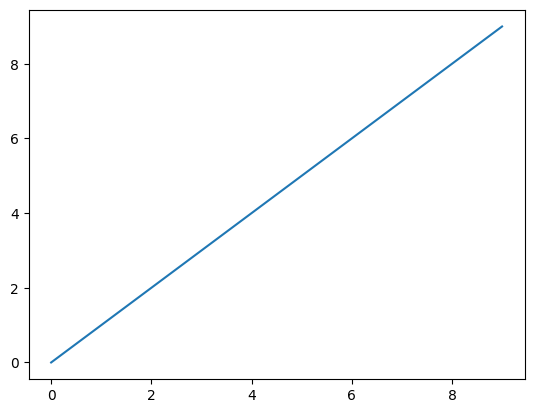

In [56]:
i = list(range(0,10))
j = list(range(0,10))

plt.plot(i,j)

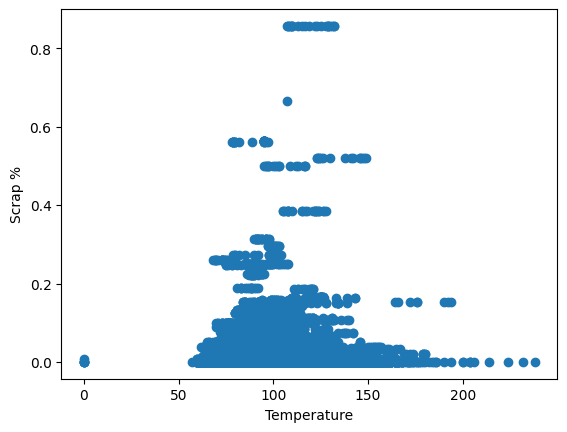

In [71]:

plt.xlabel("Temperature")
plt.ylabel("Scrap %")
plt.scatter(X[:,0],y)

(array([5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.2970e+03,
        2.1178e+04, 7.4000e+01, 2.0000e+00, 0.0000e+00, 7.9000e+01]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <BarContainer object of 10 artists>)

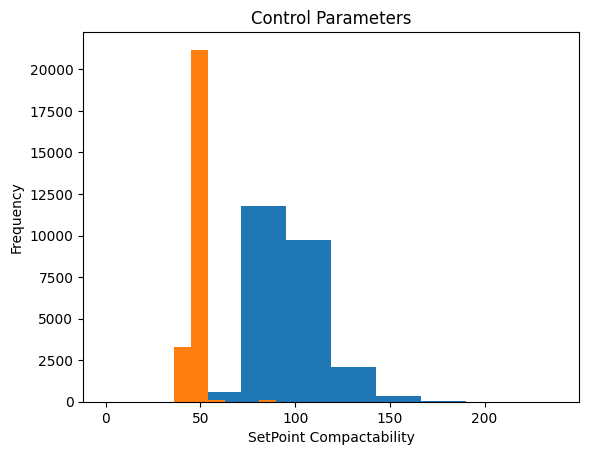

In [261]:
plt.title("Control Parameters")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.hist(X[:,0])

plt.xlabel("SetPoint Compactability")
plt.ylabel("Frequency")

plt.hist(X[:,1])


In [262]:
pwd

'C:\\Users\\Nathan'